**1. Librerias**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# bibliotecas basicas
import os
import numpy as np
import pandas as pd


#módulos de visualización
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

#Ayudantes de modelos comunes
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             auc,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)

# manejo de conjuntos de datos de desequilibrio

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)


# algoritmos modelo
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2547,55526,Male,46.0,0,0,Yes,Govt_job,Urban,58.63,35.3,never smoked,0
1378,7806,Female,42.0,0,0,Yes,Private,Urban,158.89,37.6,smokes,0
2015,69339,Male,11.0,0,0,No,children,Urban,99.79,20.2,Unknown,0
4285,57343,Female,71.0,0,0,Yes,Private,Urban,134.65,32.4,Unknown,0
97,56841,Male,58.0,0,1,Yes,Private,Rural,240.59,31.4,smokes,1
4669,29078,Male,39.0,0,0,Yes,Govt_job,Rural,73.07,26.8,smokes,0
780,42441,Male,7.0,0,0,No,children,Urban,152.81,17.7,Unknown,0
3474,65407,Female,64.0,0,0,Yes,Self-employed,Rural,65.46,32.5,formerly smoked,0
2566,61559,Male,7.0,0,0,No,children,Urban,86.60,17.1,Unknown,0
698,14391,Female,30.0,0,0,Yes,Private,Rural,89.63,23.2,smokes,0


Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.📊

Información de atributos 🎯:

edad 📅

hipertensión 🩺

enfermedad del corazón ❤️

casado 💍

tipo_trabajo 👔

Tipo_residencia 🏠

promedio nivel de glucosa 🍬

IMC ⚖️

estado_de_tabaquismo 🚬

género 👥

In [4]:
df2 = df.copy()

**2. Distribución del estado del accidente cerebrovascular**

In [5]:
df2['stroke'] = df2['stroke'].replace({1: 'Yes', 0: 'No'})
stroke_counts = df2['stroke'].value_counts().reset_index()
stroke_counts.columns = ['Stroke', 'Count']
custom_colors = ['#52FF33', '#FF3333']
fig = px.pie(stroke_counts, names='Stroke', values='Count',
             title='Distribución del estado del accidente cerebrovascular',
             color_discrete_sequence=custom_colors,
             hole=0.3
             )

fig.show()

El gráfico circular representa visualmente la distribución de los casos de accidente cerebrovascular dentro del conjunto de datos, clasificándolos efectivamente en categorías "Sin accidente cerebrovascular" y "Accidente cerebrovascular". Ilustra vívidamente el desequilibrio de clases del conjunto de datos, con un número significativamente mayor de casos "sin accidente cerebrovascular" en comparación con casos de "accidente cerebrovascular". La clara diferenciación de color del gráfico y el orificio central mejoran su atractivo visual. Sin embargo, transmite principalmente la distribución de los casos de accidente cerebrovascular y es posible que no proporcione información más profunda sobre otros factores.

**3. Data Preprocessing**

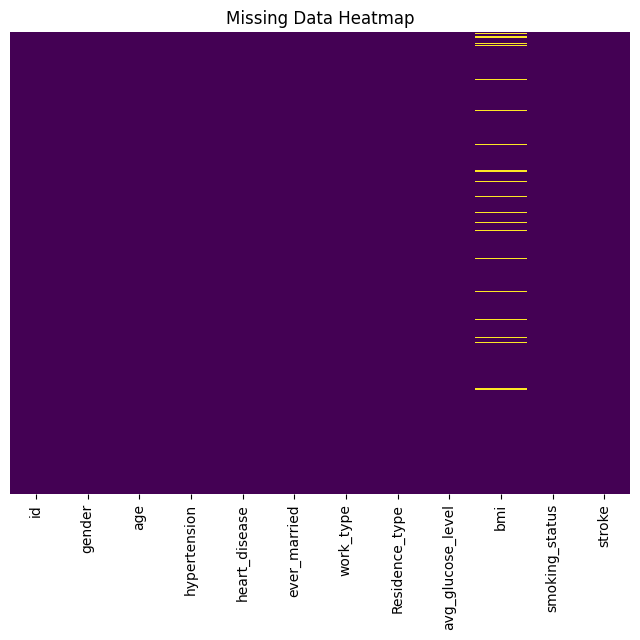

<bound method NDFrame._add_numeric_operations.<locals>.sum of          id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   
5107  False   False  False         False          False         False   
5108  False   False  False         False          False         False   
5109  False   False  False         False          False         False   

      work_type  Residence_type  avg_glucose_level    bmi  sm

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()
df.isnull().sum

In [7]:
column_values = df['bmi'].dropna()
sampled_values = np.random.choice(column_values, size=df['bmi'].isnull().sum(), replace=True)
df.loc[df['bmi'].isnull(), 'bmi'] = sampled_values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

En este paso, abordamos los valores faltantes en el conjunto de datos. Específicamente, manejamos valores nulos en la columna 'bmi' reemplazándolos con valores elegidos al azar.

In [8]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)

Reemplazamos los valores 'Desconocidos' en la columna 'smoking_status' con valores nulos para que los datos sean más consistentes.

In [9]:
custom_colors = ['#0E2B59', '#355384', '#7793BE' , '#C6CBD2']
fig = px.pie(df,names='smoking_status' , color_discrete_sequence=custom_colors)
fig.show()

Abordamos los valores atípicos en la columna 'IMC'. Los valores atípicos pueden afectar el rendimiento de los modelos de aprendizaje automático, por lo que tomamos medidas para gestionarlos.

Manejo de valores atípicos (En proceso)

In [10]:
#Falta por realizar

--------------------------------------------------------------

Para preparar datos categóricos para el análisis, aplicamos técnicas de codificación. Usamos codificación de etiquetas para 'género', 'siempre_casado' y 'tipo_residencia'. Además, empleamos codificación one-hot para 'work_type' y 'smoking_status' para convertirlos en variables binarias adecuadas para análisis y modelado. Estas técnicas de codificación ayudan a transformar datos categóricos en un formato con el que los algoritmos de aprendizaje automático puedan funcionar de forma eficaz.

In [11]:
column_values = df['smoking_status'].dropna()
sampled_values = np.random.choice(column_values, size=df['smoking_status'].isnull().sum(), replace=True)
df.loc[df['smoking_status'].isnull(), 'smoking_status'] = sampled_values

In [12]:
fcustom_colors = ['#0E2B59', '#355384', '#7793BE' , '#C6CBD2']
fig = px.pie(df,names='smoking_status' , color_discrete_sequence=custom_colors)
fig.show()

**4. Codificación de datos de categoría**

Realizamos el cambio de variables de etiquetas con valores numericos

In [13]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [14]:
df=df[(df['gender'] != 'Other')]

In [15]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [16]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [17]:
df["gender"]=df["gender"].str.replace("Male","1")
df["gender"]=df["gender"].str.replace("Female","0")
df["gender"]=df["gender"].astype("int32")

In [18]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,40.5,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,Yes,Private,Urban,83.75,32.5,never smoked,0
5106,44873,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
df["Residence_type"]=df["Residence_type"].str.replace("Rural","0")
df["Residence_type"]=df["Residence_type"].str.replace("Urban","1")
df["Residence_type"]=df["Residence_type"].astype("int32")

In [20]:
df.drop(['id'],axis=1,inplace = True)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import RidgeCV
le = preprocessing.LabelEncoder()

/-----------------------------/

In [22]:
df_resampled = pd.get_dummies(df , columns =  ['gender','ever_married','work_type','Residence_type','smoking_status'] ,drop_first=True )

In [23]:
df_resampled

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_1,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,0,0
1,61.0,0,0,202.21,40.5,1,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,32.5,0,0,1,0,1,0,0,1,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,0,0


In [24]:
x1 = df_resampled.drop('stroke', axis = 1)
y1 = pd.to_numeric( df_resampled['stroke'])

In [25]:
scaler = StandardScaler()

x_resampled = scaler.fit_transform(x1)

In [26]:
x_train_resampled , x_test_resampled , y_train_resampled , y_test_resampled = train_test_split(x_resampled,y1,test_size = .20)

**4. Modelado y Evaluaciones**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier
# from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

Modelo 1 con regresión logística

Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Set: 0.952054794520548

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       973
           1       0.00      0.00      0.00        49

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



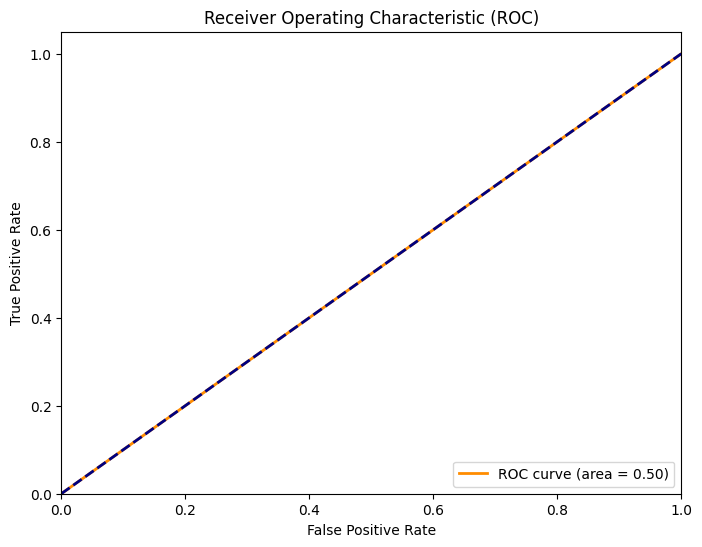

In [54]:
#Definir la cuadrícula de parámetros para la búsqueda de cuadrícula.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Crear un clasificador de regresión logística
logistic_classifier = LogisticRegression()

# Cree un objeto de búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5)

# Ajustar la búsqueda de cuadrícula a los datos de entrenamiento.
grid_search.fit(x_train_resampled, y_train_resampled)

# Obtenga los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_logistic_classifier = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba.
y_pred_Lg = best_logistic_classifier.predict(x_test_resampled)

# Calcule la precisión e imprima el informe de clasificación.
accuracy = accuracy_score(y_test_resampled, y_pred_Lg)
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_Lg))

# Curva ROC
roc_auc = roc_auc_score(y_test_resampled, best_logistic_classifier.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_logistic_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



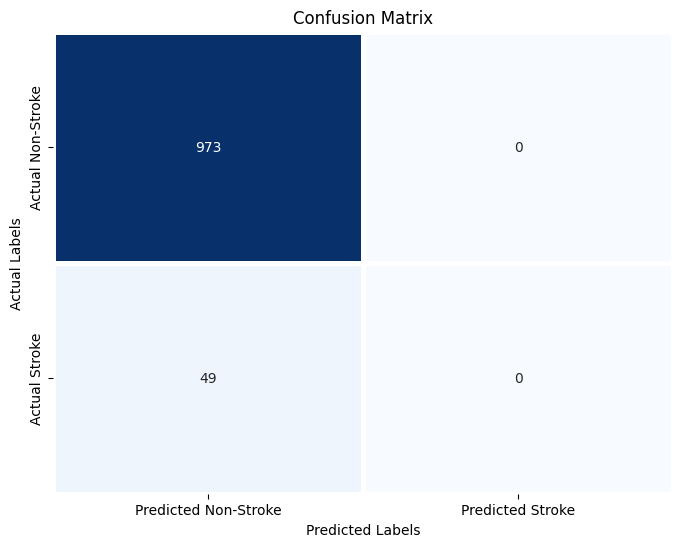

In [36]:
# Matriz de confusión
conf_matrix_Lg = confusion_matrix(y_test_resampled, y_pred_Lg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_Lg, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()

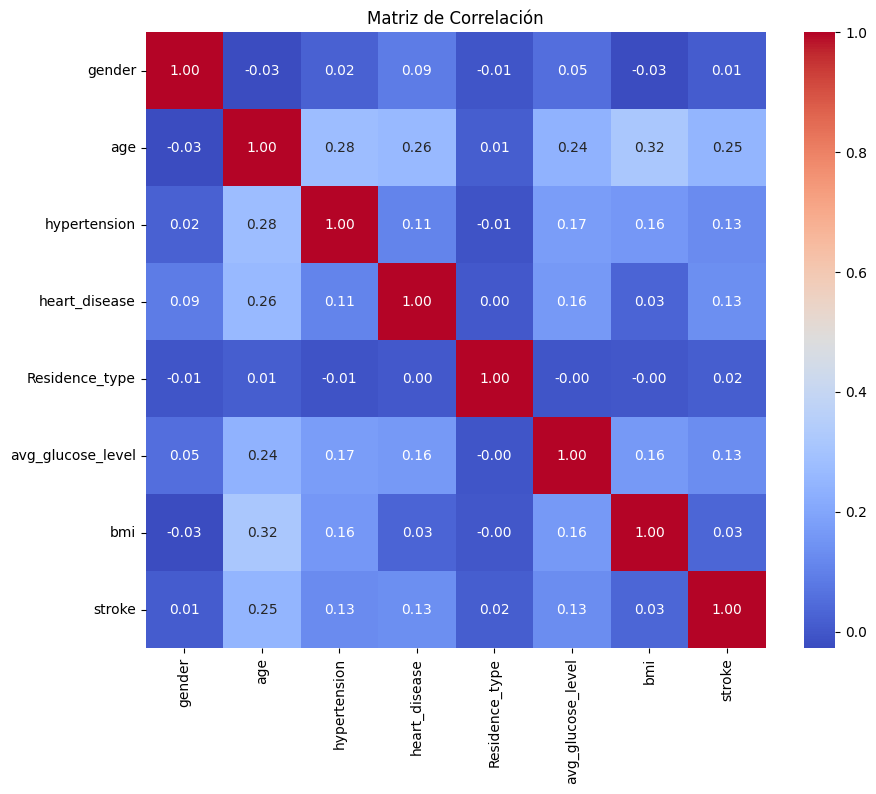

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico si es necesario
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()

In [55]:
num_datos = df.size

print(f'Número total de datos en el DataFrame: {num_datos}')

Número total de datos en el DataFrame: 8000


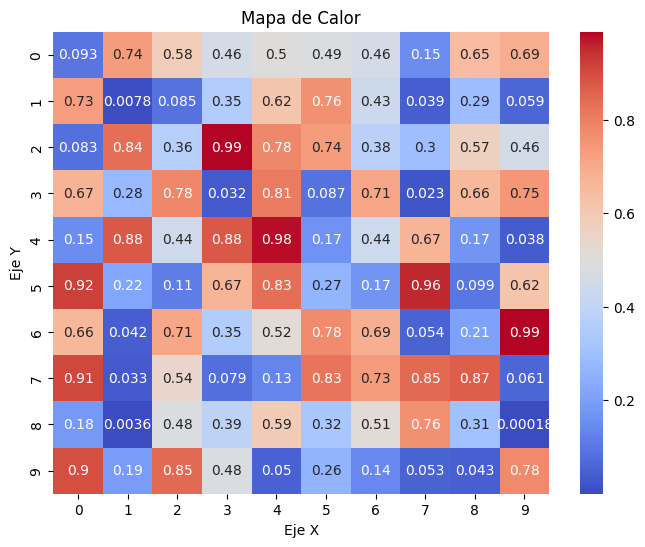

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = np.random.rand(10, 10)

# Crear el gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap='coolwarm', cbar=True)

# Añadir etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Mapa de Calor')

# Mostrar el gráfico
plt.show()

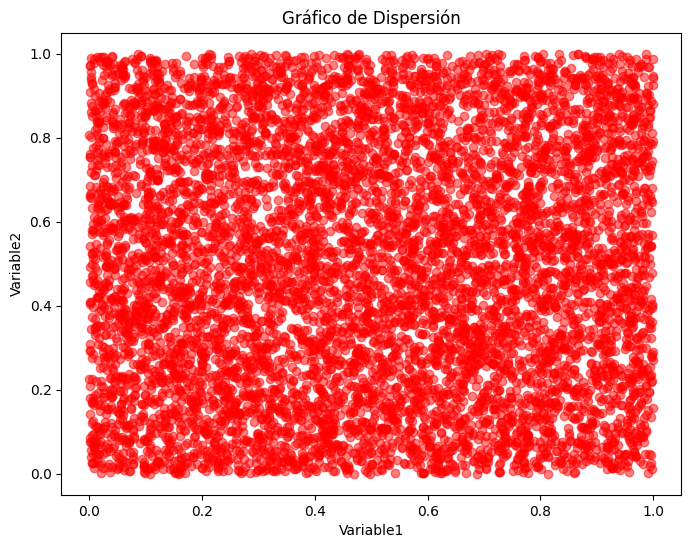

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generar 8000 puntos aleatorios
np.random.seed(0)
variable1 = np.random.rand(8000)
variable2 = np.random.rand(8000)

# Crear un DataFrame con las variables generadas aleatoriamente
data = {'Variable1': variable1, 'Variable2': variable2}
df = pd.DataFrame(data)

# Gráfico de dispersión utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df['Variable1'], df['Variable2'], color='red', alpha=0.5)  # Usamos alpha para hacer los puntos semi-transparentes
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.title('Gráfico de Dispersión')
plt.show()


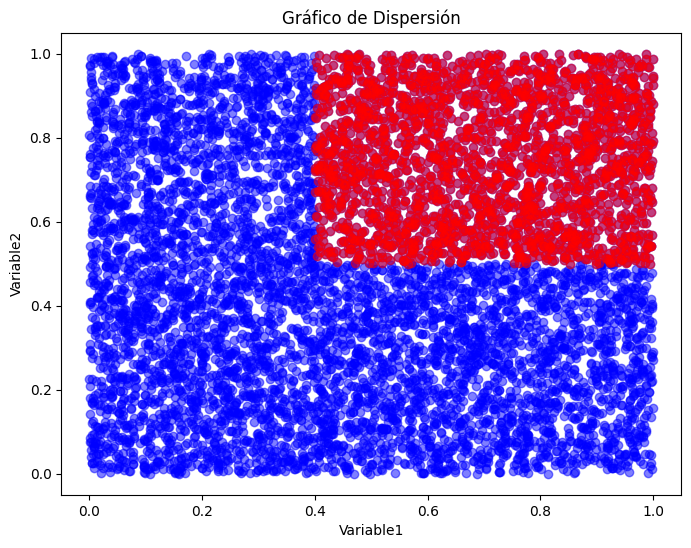

In [59]:
#Filtramos los puntos
puntos_interesantes = df[(df['Variable1'] > 0.4) & (df['Variable2'] > 0.5)]

# Graficar los puntos de interés
plt.figure(figsize=(8, 6))
plt.scatter(df['Variable1'], df['Variable2'], color='blue', alpha=0.5)  # Todos los puntos
plt.scatter(puntos_interesantes['Variable1'], puntos_interesantes['Variable2'], color='red', alpha=0.5)  # Puntos de interés
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.title('Gráfico de Dispersión')
plt.show()